# BCB 726
## Lecture 6

*Whereupon the assembled thronges of studentes desirynge lernynge are yentroduced unto the wisdome of Modal Notebokes and scikit-lerne* 


### The kynde lordes of Modal han with hir wordes ygraunted unto us grete golde

```
We're happy to sponsor the course with $500 in compute credits for each student.

Students can get credits by
* Signing up for Modal: https://modal.com/signup
* Filling out this form: https://modal.com/credits
In that form, entering the following credit code: ###-###-###
```

In [1]:
###########################################
#    let's install everything we need     #
###########################################

# kagglehub to download data
%uv pip install kagglehub

# pandas to read data into memory
%uv pip install pandas

# scikit-learn to...learn things
%uv pip install scikit-learn 

Using Python 3.12.6 environment at: /usr/local
Audited 1 package in 37ms
Note: you may need to restart the kernel to use updated packages.
Using Python 3.12.6 environment at: /usr/local
Audited 1 package in 5ms
Note: you may need to restart the kernel to use updated packages.
Using Python 3.12.6 environment at: /usr/local
Audited 1 package in 6ms
Note: you may need to restart the kernel to use updated packages.


In [2]:

import kagglehub
import pandas as pd 

# download the Onion or Not dataset as a local CSV file
local_path = kagglehub.dataset_download("chrisfilo/onion-or-not", path="OnionOrNot.csv")

# read the CSV file as a Pandas DataFrame object
#   - expected: 24k rows, columns: 'text' and 'label'
df = pd.read_csv(local_path)
df

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1
...,...,...
23995,Teen Pregnancy Rate Prompting More High School...,1
23996,Connecticut TV station under fire after using ...,0
23997,Jurisprudence Fetishist Gets Off On Technicality,1
23998,Employees From Other Department Announce Plan ...,1


In [3]:
# The Onion!
df[df.label == 1].text.iloc[0]

'Entire Facebook Staff Laughs As Man Tightens Privacy Settings'

In [5]:
# Not The Onion!
df[df.label != 1].text.iloc[1]

'Omaha dad finds pot brownies, eats 4 of them, says mean things to cat'

In [33]:
# let's simplify the text with some normalization first


import re

def normalize_text(text):
    # convert to lowercase
    text = text.lower()
    for c in "!?.;:-''":
        text = text.replace(c, "")
    # remove extra whitespace
    parts = text.split()
    return " ".join(parts)
    
# apply normalization to the text column
df['normalized_text'] = df['text'].apply(normalize_text)

In [34]:
df

,text,label,normalized_text
0,Entire Facebook Staff Laughs As Man Tightens P...,1,entire facebook staff laughs as man tightens p...
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,muslim woman denied soda can for fear she coul...
2,Bold Move: Hulu Has Announced That They’re Gon...,1,bold move hulu has announced that they’re gonn...
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,despondent jeff bezos realizes he’ll have to w...
4,"For men looking for great single women, online...",1,"for men looking for great single women, online..."
...,...,...,...
23995,Teen Pregnancy Rate Prompting More High School...,1,teen pregnancy rate prompting more high school...
23996,Connecticut TV station under fire after using ...,0,connecticut tv station under fire after using ...
23997,Jurisprudence Fetishist Gets Off On Technicality,1,jurisprudence fetishist gets off on technicality
23998,Employees From Other Department Announce Plan ...,1,employees from other department announce plan ...


In [35]:

# before we start, let's set a random seed...
# this very important work needs to reproducible!


# NumPy is the library that does all the data representation 
# and math operations under the hood for both scikit-learn and Pandas
import numpy as np

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [36]:
# handy helper from scikit-learn 
from sklearn.model_selection import train_test_split

# train/test split 
X_train_text, X_test_text, y_train, y_test = train_test_split(
    # array of text strings
    df['normalized_text'].values, 
    # array of integer labels
    df['label'].values,
    # keep 20% of samples for test set
    test_size=0.2, 
    # make sure label fractons are balanced between train/test
    stratify=df['label'].values
)

print("X_train", len(X_train_text))
print("y_train", len(y_train))
print("X_test", len(X_test_text))
print("y_train", len(y_test))
print("fraction +ve in train", y_train.mean())

print("fraction +ve in test", y_test.mean())



X_train 19200
y_train 19200
X_test 4800
y_train 4800
fraction +ve in train 0.375
fraction +ve in test 0.375


In [37]:
# but wait...how do we learn from text!?

X_train_text[:5]

array(['all seven of lance armstrongs tour de france wins would now go to cyclists with doping scandals of their own',
       'new rule please remove the onion americas finest news source from the title of submissions',
       'female group ejected from comic expo for criticizing feminism',
       'woman boasts of stealing car, robbing bank in youtube video',
       '114yearold attributes longevity to sheer random chance'],
      dtype=object)

In [38]:
# what if we just count the individual characters?
from sklearn.feature_extraction.text import CountVectorizer

char_vectorizer = CountVectorizer(analyzer='char', ngram_range=(1,1))


In [39]:
char_vectorizer

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"
,analyzer,'char'


In [40]:
# OK, but this data is small, so no need for sparse representation...

X_train_counts_char = char_vectorizer.fit_transform(X_train_text).toarray()
X_train_counts_char

array([[19,  0,  0, ...,  0,  0,  0],
       [14,  0,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       ...,
       [27,  0,  0, ...,  0,  0,  0],
       [ 4,  0,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0]])

In [41]:
# what did the "fit" part of fit_transform do?
char_vectorizer.vocabulary_


{'a': 29,
 'l': 40,
 ' ': 0,
 's': 47,
 'e': 33,
 'v': 50,
 'n': 42,
 'o': 43,
 'f': 34,
 'c': 31,
 'r': 46,
 'm': 41,
 't': 48,
 'g': 35,
 'u': 49,
 'd': 32,
 'w': 51,
 'i': 37,
 'y': 53,
 'h': 36,
 'p': 44,
 'b': 30,
 'j': 38,
 'x': 52,
 'z': 54,
 ',': 10,
 'k': 39,
 '1': 13,
 '4': 16,
 '5': 17,
 'q': 45,
 '‘': 84,
 '’': 85,
 '7': 19,
 '$': 3,
 '0': 12,
 '"': 1,
 '£': 58,
 '(': 6,
 ')': 7,
 '3': 15,
 '2': 14,
 '8': 20,
 '“': 86,
 '”': 87,
 '6': 18,
 '—': 83,
 '9': 21,
 '…': 89,
 '€': 93,
 '%': 4,
 '&': 5,
 '/': 11,
 '|': 55,
 '[': 24,
 ']': 26,
 '_': 27,
 '@': 23,
 '«': 59,
 '\u202a': 90,
 '\u202c': 91,
 '#': 2,
 '*': 8,
 '–': 82,
 '+': 9,
 'é': 68,
 'ü': 74,
 '\x99': 57,
 'á': 64,
 'í': 69,
 '•': 88,
 'ç': 67,
 '\u200b': 80,
 'ñ': 71,
 '\x80': 56,
 'â': 65,
 'ä': 66,
 '=': 22,
 'а': 77,
 '♥': 94,
 '½': 63,
 '\xad': 60,
 'λ': 76,
 'о': 79,
 '\u200f': 81,
 'ö': 73,
 'ï': 70,
 'е': 78,
 '′': 92,
 'ğ': 75,
 '`': 28,
 '·': 62,
 '교': 102,
 '대': 111,
 '오': 134,
 '피': 152,
 '안': 130,
 '마': 

In [43]:
print(
    X_train_text[0])
print(
    X_train_counts_char[0, :])

all seven of lance armstrongs tour de france wins would now go to cyclists with doping scandals of their own
[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  6  0  5  4  6  3  3  2  5  0  0  6  1  9 10  1  0  5  8
  6  2  1  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [42]:

# TO AVOID CHEATING: only transform on the test data (never fit)

X_test_counts_char  = char_vectorizer.transform(X_test_text).toarray()
X_test_counts_char

array([[ 7,  0,  0, ...,  0,  0,  0],
       [ 9,  0,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       ...,
       [ 8,  0,  0, ...,  0,  0,  0],
       [13,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0]])

In [44]:
# now let's get to work with a truly powerful 
# machine learning method!

# ....yes, linear regression!
from sklearn.linear_model import LinearRegression


linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_counts_char, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
# inspect the model 
linear_regression_model.coef_

array([-1.04889030e-02, -1.42352910e-01, -1.42497697e-01, -1.94184617e-01,
        9.89084484e-02,  4.53578839e-02,  2.23224345e-01, -2.28859282e-01,
       -4.48598968e-02, -1.41492993e-01, -9.33122614e-02, -1.07927667e-01,
        2.12600294e-02, -4.63549134e-02,  5.32647164e-02,  1.22790152e-02,
        3.58746655e-02,  7.92464641e-02,  5.22928213e-02,  7.65613300e-02,
        1.03197128e-01,  3.57816743e-02,  5.03319178e-02,  1.03696415e-01,
        8.82815052e-02, -1.20299225e-01,  8.82815052e-02,  1.62388654e-01,
        4.11191261e-02, -9.62050832e-03, -8.73665159e-03, -1.16090943e-02,
       -1.10067586e-02,  1.69333996e-02,  6.91418099e-03,  3.94408404e-03,
        2.31971169e-02,  1.14987750e-02,  2.67282142e-02,  2.99698389e-05,
        1.13514420e-02,  8.84410920e-03,  7.85652602e-03,  1.31945766e-02,
       -7.37774166e-03,  2.93740780e-02, -1.05804264e-02, -1.90081702e-02,
        1.47365316e-02,  2.84263516e-02,  1.14812005e-02,  2.22338618e-02,
       -3.51012841e-02,  

In [46]:
# let's make predictions on unseen data!

y_score = linear_regression_model.predict(X_test_counts_char)
y_score

array([0.26342935, 0.40912507, 0.12853764, ..., 0.29547633, 0.30647728,
       0.46126327])

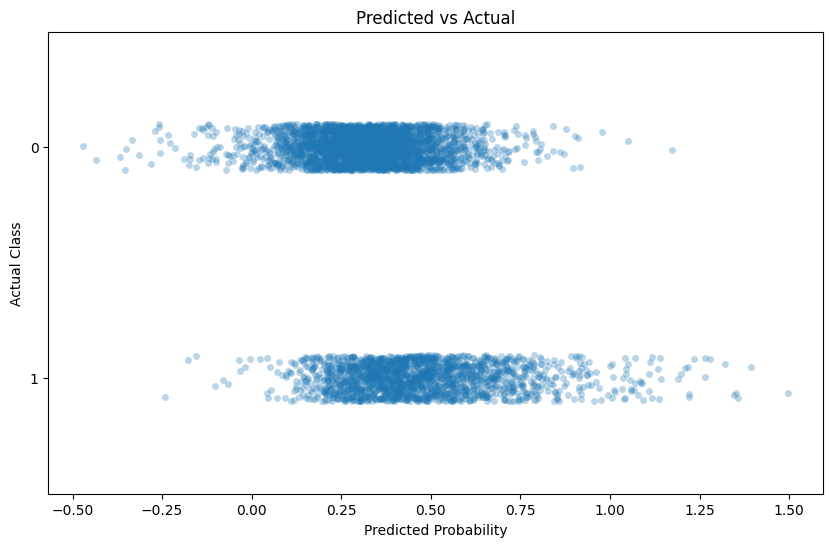

In [47]:
# visualize the predictions

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.stripplot(x=y_score, y=y_test, orient='h', alpha=0.3, jitter=0.1)
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Class')
plt.title('Predicted vs Actual')
plt.show()

In [48]:
# let's write down some evaluation metrics 
# assuming we get predicted scores and want to 
# both look at AUC-ROC for scores and 
# accuracy / F1 of thresholded categorical predictions 

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def compute_metrics(y_true, y_score, threshold=0.5):
    y_pred = (y_score >= threshold)
    acc = accuracy_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred)
    auc  = roc_auc_score(y_true,  np.clip(y_score,0,1))
    return acc, f1, auc, y_pred

def print_metrics(y_true, y_score, threshold=0.5):
    acc, f1, auc, _ = compute_metrics(y_true, y_score, threshold)
    print("Accuracy: %0.2f" % (acc * 100))
    print("F1: %0.2f" % (f1,))
    print("AUC: %0.2f" % (auc,))
    

# maybe linear regression isn't so bad after all!
print_metrics(y_test, y_score)


Accuracy: 69.94
F1: 0.49
AUC: 0.72


In [49]:
# OK fine, what if we do the "right" thing and use logistic regression?


from sklearn.linear_model import LogisticRegression


logistic_regression_model = LogisticRegression()
logistic_regression_model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [50]:
# Now we just have to fit the model
# ...it will definitely work the first time
# ...and give us better predictive accuracy
# ...right?
# ...right?

# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)

# spoiler alert: this doesn't converge
logistic_regression_model.fit(X_train_counts_char, y_train)

# extra spoiler alert: this doesn't give you scores
y_score = logistic_regression_model.predict(X_test_counts_char)

# final spoiler alert: this is actually worse than linear regression!
print_metrics(y_test, y_score)

# see, these are just binary
set(y_score)

Accuracy: 70.08
F1: 0.52
AUC: 0.65


/usr/local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{np.int64(0), np.int64(1)}

In [51]:
# first, let's get scores out of the predictor

y_class_probs = logistic_regression_model.predict_proba(X_test_counts_char)
y_class_probs

array([[0.81129884, 0.18870116],
       [0.59749119, 0.40250881],
       [0.86063002, 0.13936998],
       ...,
       [0.72107438, 0.27892562],
       [0.7205819 , 0.2794181 ],
       [0.53378139, 0.46621861]])

In [52]:
# score is the probability of label == 1
y_score = logistic_regression_model.predict_proba(X_test_counts_char)[:, 1]

# see, it's better!
print_metrics(y_test, y_score)


Accuracy: 70.08
F1: 0.52
AUC: 0.72


In [53]:
# but why did we get divergence warnings?

# features are often expected to be small (either between 0 and 1 or z-scored)
X_train_counts_char.max()



np.int64(60)

In [54]:
# let's make a proper training pipeline 
# with all our feature preprocessing and 
# predictor steps

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Create pipeline that auto-scales then fits
pipeline = Pipeline([
    # turn strings into character counts
    ('vectorizer', CountVectorizer(analyzer='char', ngram_range=(1,1))),
    # materialize dense matrices of counts
    ('to_dense', FunctionTransformer(lambda X: X.toarray(), accept_sparse=True)),
    # normalize the counts to be z-scores
    ('scaler', StandardScaler()),
    # stick a classifier on the end
    ('classifier', LogisticRegression())
])
pipeline

,steps,"[('vectorizer', ...), ('to_dense', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [55]:

# use pipeline like normal LogisticRegression

pipeline.fit(X_train_text, y_train)

# you can ccess elements of the pipeline by name 
pipeline['classifier'].coef_

array([[-0.2412212 , -0.40293659, -0.03847891, -0.2113887 ,  0.03531226,
         0.01613238,  0.09833201, -0.10365922, -0.05764095, -0.01909266,
        -0.27018173, -0.08001514,  0.06288955, -0.09214454,  0.073112  ,
         0.01289062,  0.03099888,  0.09908013,  0.05026835,  0.06872459,
         0.07902377,  0.03128929,  0.00416557,  0.00488393,  0.02874733,
        -0.03009097,  0.02874733,  0.19059192,  0.00118283, -0.13484328,
        -0.05070776, -0.09389024, -0.0957087 ,  0.29969057,  0.04846269,
         0.02468068,  0.21727707,  0.14555523,  0.05612398, -0.00125212,
         0.11164114,  0.05652497,  0.09434943,  0.17841688, -0.05128887,
         0.03156497, -0.12404694, -0.24110271,  0.20750313,  0.21368517,
         0.04377993,  0.12300704, -0.07375518,  0.21728318,  0.00826454,
         0.13339656, -0.08659638,  0.17710817, -0.37377349, -0.11692918,
        -0.05496739, -0.03009097,  0.05467849, -0.0961251 , -0.00104982,
         0.12999718,  0.00461502,  0.08175382,  0.0

In [56]:
# are we doing any better? 

y_score = pipeline.predict_proba(X_test_text)[:, 1]



print_metrics(y_test, y_score)

# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)


Accuracy: 70.10
F1: 0.52
AUC: 0.72


In [57]:
# fine! it's time for a neural network!
# 🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
# let's goo!

from sklearn.neural_network import MLPClassifier

# certainly this will be an improvement!
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='char', ngram_range=(1,1))),
    ('to_dense', FunctionTransformer(lambda X: X.toarray(), accept_sparse=True)),
    ('scaler', StandardScaler(with_mean=True)),
    # linear model with cross-entropy (i.e., multinomial logistic regression)
    ('classifier',  MLPClassifier(
                    hidden_layer_sizes=(),  # zero hidden layers
                    solver='lbfgs',         # deterministic, like LR's lbfgs
                    alpha=1e-4,             # L2 penalty (roughly analogous to 1/C)
    ))
])

pipeline.fit(X_train_text, y_train)
y_score = pipeline.predict_proba(X_test_text)[:, 1]
print_metrics(y_test, y_score)

# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)
# (｡•́︿•̀｡)



Accuracy: 70.12
F1: 0.52
AUC: 0.72


In [58]:

# but wait....

mlp_but_bigger =  MLPClassifier(
        hidden_layer_sizes=(128, ),   
        activation='relu',           
        solver='adam',                
        alpha=1e-4,                  
        learning_rate='adaptive',   
        max_iter=200,                
        early_stopping=True,
        n_iter_no_change=10)

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='char', ngram_range=(1,1))),
    ('to_dense', FunctionTransformer(lambda X: X.toarray(), accept_sparse=True)),
    ('scaler', StandardScaler(with_mean=True)),
    ('classifier', mlp_but_bigger)
])

pipeline.fit(X_train_text, y_train)
y_score = pipeline.predict_proba(X_test_text)[:, 1]

print_metrics(y_test, y_score)

# ⸜(｡˃ ᵕ ˂ )⸝ ⸜(｡˃ ᵕ ˂ )⸝
# ⸜(｡˃ ᵕ ˂ )⸝ ⸜(｡˃ ᵕ ˂ )⸝
# ⸜(｡˃ ᵕ ˂ )⸝ ⸜(｡˃ ᵕ ˂ )⸝
# ⸜(｡˃ ᵕ ˂ )⸝ ⸜(｡˃ ᵕ ˂ )⸝
# ⸜(｡˃ ᵕ ˂ )⸝ ⸜(｡˃ ᵕ ˂ )⸝


Accuracy: 73.48
F1: 0.60
AUC: 0.78


In [59]:
# what if we go bigger? 

mlp_but_even_bigger =  MLPClassifier(
        hidden_layer_sizes=(256, 128),   
        activation='relu',           
        solver='adam',                
        alpha=1e-4,                   
        learning_rate='adaptive',    
        max_iter=200,                
        early_stopping=True,
        n_iter_no_change=10)

pipeline = Pipeline([
    ('vectorizer', CountVectorizer(analyzer='char', ngram_range=(1,1))),
    ('to_dense', FunctionTransformer(lambda X: X.toarray(), accept_sparse=True)),
    ('scaler', StandardScaler(with_mean=True)),
    ('classifier', mlp_but_even_bigger)
])

pipeline.fit(X_train_text, y_train)
y_score = pipeline.predict_proba(X_test_text)[:, 1]

print_metrics(y_test, y_score)

# (｡•́︿•̀｡)


Accuracy: 72.48
F1: 0.59
AUC: 0.77


## Homework: get 90%+ accuracy 

### but don't cheat (don't use X_test / y_test)